In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Cargo el dataset desde una URL directa, que es una forma eficiente de obtener datos sin necesidad de archivos adicionales.
url = 'https://raw.githubusercontent.com/Ireneth/IA-master/main/Billionaires%20Statistics%20Dataset.csv?token=GHSAT0AAAAAACM4G3JEUBUPUB4KKWCNWGXCZNFJNBQ'
df = pd.read_csv(url)
df

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,2540,1000,Healthcare,Yu Rong,51.0,China,Shanghai,Health clinics,Healthcare,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2636,2540,1000,Food & Beverage,"Richard Yuengling, Jr.",80.0,United States,Pottsville,Beer,Food & Beverage,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2637,2540,1000,Manufacturing,Zhang Gongyun,60.0,China,Gaomi,Tyre manufacturing machinery,Manufacturing,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2638,2540,1000,Real Estate,Zhang Guiping & family,71.0,China,Nanjing,Real estate,Real Estate,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397


In [2]:
# Describo el dataset para entender su estructura y contenido
print("Descripción del Dataset:")
print(df.info())  # Esto me mostrará un resumen de las columnas, tipos de datos y valores no nulos.

Descripción del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   

In [3]:
print("\nPrimeras filas del dataset:")
print(df.head())  # Muestro las primeras filas para obtener una vista previa de los datos.


Primeras filas del dataset:
   rank  finalWorth               category                personName   age  \
0     1      211000       Fashion & Retail  Bernard Arnault & family  74.0   
1     2      180000             Automotive                 Elon Musk  51.0   
2     3      114000             Technology                Jeff Bezos  59.0   
3     4      107000             Technology             Larry Ellison  78.0   
4     5      106000  Finance & Investments            Warren Buffett  92.0   

         country    city              source             industries  \
0         France   Paris                LVMH       Fashion & Retail   
1  United States  Austin       Tesla, SpaceX             Automotive   
2  United States  Medina              Amazon             Technology   
3  United States   Lanai              Oracle             Technology   
4  United States   Omaha  Berkshire Hathaway  Finance & Investments   

  countryOfCitizenship  ... cpi_change_country           gdp_country  \
0  

El problema de clasificación que busco resolver implica predecir la 'category' (categoría) de un multimillonario basándome en atributos como 'finalWorth', 'age', 'country','industries', entre otros. Esta es una tarea de clasificación multiclase, ya que 'category' tiene varias clases posibles.

In [4]:
# En el preprocesamiento, me aseguro de que los datos estén listos para el análisis y modelado.
# Trato con valores faltantes. Aquí, opto por rellenar los valores faltantes numéricos con la media.
df.fillna(df.mean(), inplace=True)

<ipython-input-4-9cdfe15c6c16>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [5]:
# Selecciono las columnas relevantes para el problema de clasificación.
input_columns = ['age', 'country', 'industries', 'selfMade', 'gender', 'gdp_country']
output_column = 'category'

In [6]:
# Preproceso los datos: Codifico las variables categóricas y normalizo los datos.
label_encoder = LabelEncoder()
for col in input_columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])
df[output_column] = label_encoder.fit_transform(df[output_column])

In [7]:
# Convertir la columna 'gdp_country' a numérica (si contiene valores monetarios en formato de cadena)
df['gdp_country'] = df['gdp_country'].replace('[\$,]', '', regex=True).astype(float)

In [8]:
# Elimino columnas no necesarias para simplificar el modelo y enfocarme en los atributos relevantes.
df.drop(['personName', 'organization', 'birthDate', 'lastName', 'firstName', 'title', 'date', 'state', 'residenceStateRegion'], axis=1, inplace=True)

In [9]:
scaler = StandardScaler()
df[input_columns] = scaler.fit_transform(df[input_columns])
# Realizo un análisis descriptivo y visual del dataset.
# Primero muestro estadísticas básicas.
print(df.describe())

              rank     finalWorth     category           age       country  \
count  2640.000000    2640.000000  2640.000000  2.640000e+03  2.640000e+03   
mean   1289.159091    4623.787879     8.171970 -1.291896e-16 -3.229740e-17   
std     739.693726    9834.240939     4.732236  1.000189e+00  1.000189e+00   
min       1.000000    1000.000000     0.000000 -3.600873e+00 -1.833637e+00   
25%     659.000000    1500.000000     4.000000 -6.981872e-01 -1.201833e+00   
50%    1312.000000    2300.000000     8.000000  0.000000e+00  1.999815e-01   
75%    1905.000000    4200.000000    12.000000  6.767694e-01  1.088456e+00   
max    2540.000000  211000.000000    17.000000  2.739204e+00  1.246407e+00   

         industries      selfMade        gender    birthYear   birthMonth  \
count  2.640000e+03  2.640000e+03  2.640000e+03  2640.000000  2640.000000   
mean   1.345725e-17 -6.997769e-17  9.083643e-17  1957.183307     5.740250   
std    1.000189e+00  1.000189e+00  1.000189e+00    13.089858     3

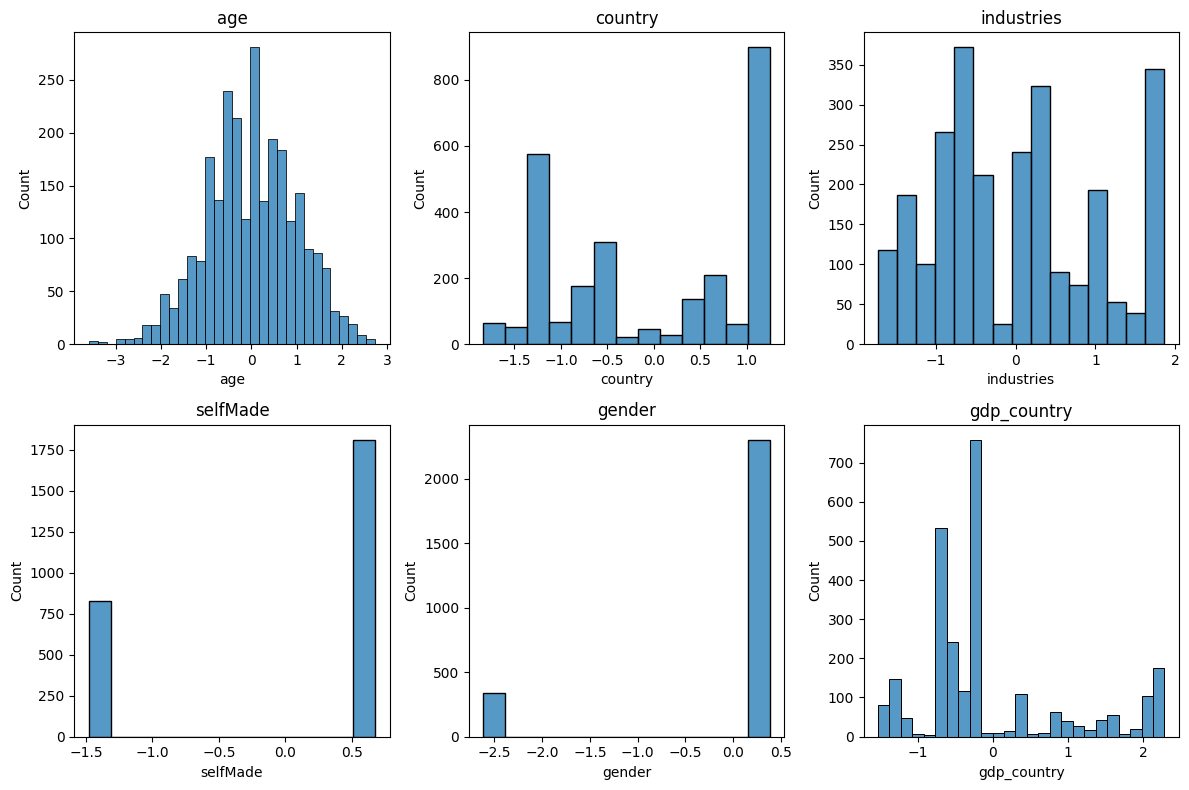

In [10]:
# Luego, visualizo las distribuciones de algunas variables de entrada.
plt.figure(figsize=(12, 8))
for i, col in enumerate(input_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [11]:
# Para la clasificación, elijo utilizar el modelo de Random Forest.
# Los parámetros clave que considero son:
# n_estimators=100: Esto establece el número de árboles en el bosque. Un mayor número puede mejorar la precisión.
# max_depth=10: Esto limita la profundidad máxima de los árboles para evitar el sobreajuste.
# random_state=42: Esto se utiliza para garantizar la reproducibilidad de los resultados.

rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

In [12]:
# Divido el dataset en un conjunto para entrenamiento y otro para pruebas. Utilizo un 70% para entrenamiento y un 30% para pruebas.
X_train, X_test, y_train, y_test = train_test_split(df[input_columns], df[output_column], test_size=0.3, random_state=42)

# Entreno el modelo con el conjunto de datos de entrenamiento.
rf_classifier.fit(X_train, y_train)

# Realizo predicciones usando el conjunto de datos de prueba.
y_pred = rf_classifier.predict(X_test)

In [13]:
# Evalúo el modelo usando el conjunto de datos de prueba y muestro el reporte de clasificación.
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.89      0.76      0.82        21
           1       0.80      0.44      0.57         9
           2       0.93      0.93      0.93        58
           3       0.78      0.83      0.81        30
           4       0.94      1.00      0.97        75
           5       0.99      1.00      1.00       107
           6       0.94      1.00      0.97        63
           7       1.00      0.20      0.33        10
           8       0.92      0.96      0.94        57
           9       0.90      0.69      0.78        13
          10       0.92      0.98      0.95       125
          11       0.81      0.71      0.76        24
          12       0.81      0.72      0.76        18
          13       0.87      0.97      0.92        67
          14       1.00      0.60      0.75        15
          15       1.00      0.85      0.92        13
          16       1.00      1.00      1.00        81


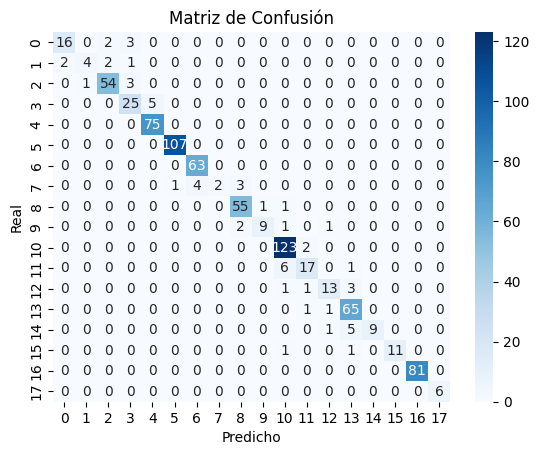

In [14]:
# Muestro la matriz de confusión para evaluar visualmente el rendimiento del modelo.
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.ylabel("Real")
plt.xlabel("Predicho")
plt.show()